In [8]:
from helper.neural_net import *
from helper.autoencoder_helper import extract_features_encoder
from models.autoencoder import Encoder, Decoder
import matplotlib.pyplot as plt
from helper.loading import *
from helper.metrics import *
from helper.image import get_imgs_gt_patches
from helper.visualisations import *
from models.features_extraction import *
from helper.const import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
ds = OriginalTrainingRoadPatches(image_dir)
dataset_train = torch.utils.data.DataLoader(ds,
                                            batch_size=1,
                                            shuffle=True
                                            )

encoder = Encoder()
decoder = Decoder()

for batch_x, batch_y in dataset_train:
    x = encoder(batch_x)
    y = decoder(x)

    break

torch.Size([1, 128, 4, 4])
torch.Size([1, 128, 6, 6])
torch.Size([1, 3, 16, 16])


In [7]:
# Train the autoencoder and save the weights
train_losses, test_losses = run_experiment('autoencoder', 'mse', 'adam', image_dir, test_dir, num_epochs=100,
               learning_rate=1e-5, autoencoder=True, lr_scheduler=True, lr_schedule=(20, 0.1), batch_size=100)

Starting training
Epoch 0 | Avg test loss: 0.05736
Epoch 1 | Avg test loss: 0.03732
Epoch 2 | Avg test loss: 0.02773
Epoch 3 | Avg test loss: 0.02161
Epoch 4 | Avg test loss: 0.01974
Epoch 5 | Avg test loss: 0.01840
Epoch 6 | Avg test loss: 0.01748
Epoch 7 | Avg test loss: 0.01699
Epoch 8 | Avg test loss: 0.01650
Epoch 9 | Avg test loss: 0.01607
Epoch 10 | Avg test loss: 0.01593
Epoch 11 | Avg test loss: 0.01545
Epoch 12 | Avg test loss: 0.01538
Epoch 13 | Avg test loss: 0.01505
Epoch 14 | Avg test loss: 0.01472
Epoch 15 | Avg test loss: 0.01407
Epoch 16 | Avg test loss: 0.01388
Epoch 17 | Avg test loss: 0.01337
Epoch 18 | Avg test loss: 0.01311
Epoch 19 | Avg test loss: 0.01302
Epoch 20 | Avg test loss: 0.01305
Epoch 21 | Avg test loss: 0.01306
Epoch 22 | Avg test loss: 0.01304
Epoch 23 | Avg test loss: 0.01302
Epoch 24 | Avg test loss: 0.01302
Epoch 25 | Avg test loss: 0.01294
Epoch 26 | Avg test loss: 0.01288
Epoch 27 | Avg test loss: 0.01294
Epoch 28 | Avg test loss: 0.01286
Epoch 

In [9]:
sum(p.numel() for p in AutoEncoder().parameters() if p.requires_grad)

760559

In [10]:
len(train_losses)

62500

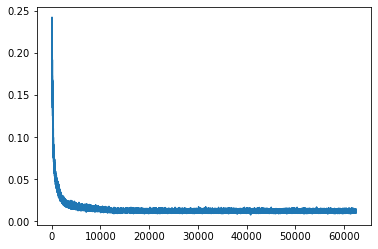

In [11]:
plt.plot(train_losses)
plt.show()

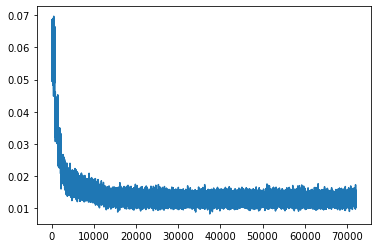

In [12]:
plt.plot(test_losses)
plt.show()

## Compare the true and reconstructed images

In [15]:
encoder_path = 'encoder_2021-12-07_16-53-36'
decoder_path = 'decoder_2021-12-07_16-53-36'

encoder = Encoder()
load_model_weights(encoder, weights_folder + "autoencoder/" + encoder_path + ".pth")

decoder = Decoder()
load_model_weights(decoder, weights_folder + "autoencoder/" + decoder_path + ".pth")

autoencoder = AutoEncoder(encoder, decoder)
autoencoder.eval()

AutoEncoder(
  (encoder): Encoder(
    (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (fc): Linear(in_features=8192, out_features=12, bias=True)
  )
  (decoder): Decoder(
    (fc): Linear(in_features=12, out_features=2048, bias=True)
    (deconv1): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (deconv2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (deconv3): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (deconv4): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (deconv5): ConvTranspose2d(16, 3, kernel_size=(5, 5), stride=(1, 1))
  )
)

In [16]:
imgs = load_all_images_in_folder(image_dir)
patches = get_img_patches(imgs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[0.1254902 , 0.12941177, 0.11764706],
        [0.12941177, 0.12941177, 0.11764706],
        [0.09803922, 0.09411765, 0.09019608],
        ...,
        [0.25950938, 0.24288327, 0.21672234],
        [0.25623396, 0.25707084, 0.22090957],
        [0.22683424, 0.22968212, 0.2054556 ]],

       [[0.10980392, 0.11372549, 0.10588235],
        [0.12941177, 0.13333334, 0.11764706],
        [0.10588235, 0.10196079, 0.09411765],
        ...,
        [0.24798265, 0.23761207, 0.20634016],
        [0.25732437, 0.24708563, 0.21758777],
        [0.26300973, 0.25037533, 0.22265306]],

       [[0.08627451, 0.09019608, 0.09019608],
        [0.11372549, 0.10980392, 0.10196079],
        [0.10588235, 0.10980392, 0.09411765],
        ...,
        [0.24582654, 0.2298896 , 0.1922031 ],
        [0.2378676 , 0.22501805, 0.19824144],
        [0.24223408, 0.23781103, 0.20096296]],

       ...,

       [[0.5254902 , 0.49803922, 0.43529412],
        [0.56078434, 0.5372549 , 0.47058824],
        [0.6431373 , 0

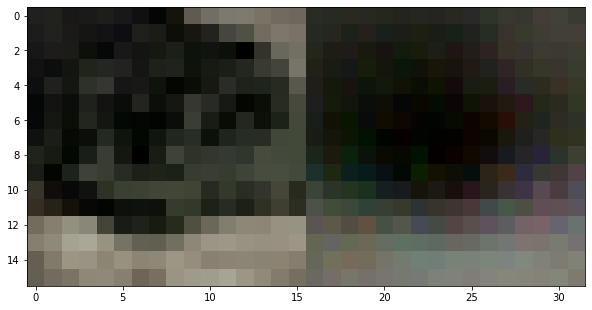

In [27]:
idx = 34
reconstructed_patch = autoencoder(torch.permute(torch.from_numpy(patches[idx]), (2, 0, 1)).unsqueeze(0))
reconstructed_patch = torch.permute(reconstructed_patch[0], (1, 2, 0))
display_imgs_side_by_side(patches[idx], reconstructed_patch.detach().numpy())

# Feature extraction

In [28]:
# Extract the patches features with the trained autoencoder
encoder = Encoder()
weights_path = 'encoder_2021-12-07_16-53-36'
X = extract_features_encoder(encoder, image_dir, weights_path)

Use GPU for features extraction.
Starting features extraction...
Features saved in output/features/features_encoder_2021-12-07_16-53-36.npy


In [29]:
X.shape

(62500, 12)

In [30]:
# Load images
imgs, gt_imgs = load_images_and_groundtruth(image_dir, gt_dir)
patches, gt_patches = get_imgs_gt_patches(imgs, gt_imgs)

y = build_gt_from_patches(gt_patches, lambda gt_patch: value_to_class(gt_patch, threshold=0.5))

X_train, y_train, X_test, y_test = split_data(X, y, ratio=0.8)

Loaded 100 images
All images have the same size !
Image size = 400, 400


In [31]:
X_train.shape, X_test.shape

((50000, 12), (12500, 12))

IndexError: index 3 is out of bounds for axis 0 with size 3

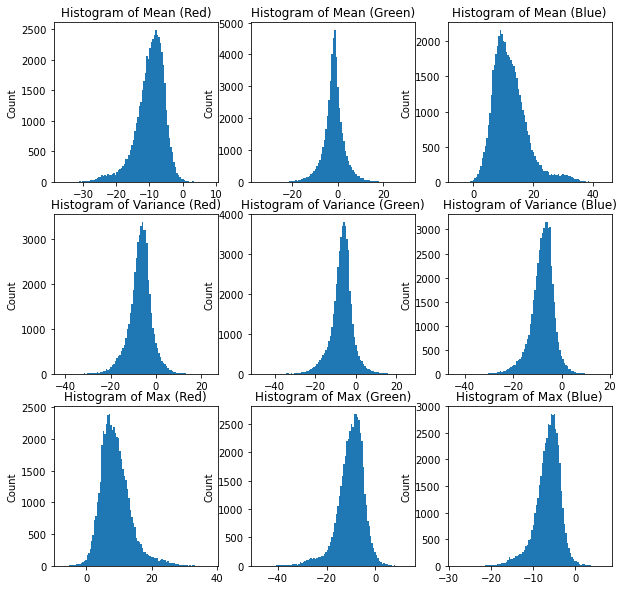

In [32]:
plot_features_distributions(X_train, save_img=True)

In [33]:
# Standardize the features
X_train, means, stds = standardize_features(X_train)

# Standardize the test data with the same statistics
X_test, _, _ = standardize_features(X_test, means=means, stds=stds)

In [34]:
log_reg = LogisticRegression(class_weight='balanced')

In [35]:
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [36]:
y_pred = log_reg.predict(X_test)

In [38]:
svm_rbf = SVC(class_weight='balanced', kernel='rbf', cache_size=7000)

In [39]:
svm_rbf.fit(X_train, y_train)

SVC(cache_size=7000, class_weight='balanced')

In [40]:
y_pred = svm_rbf.predict(X_test)

In [41]:
_, _, _, _ = compute_scores(y_test, y_pred)

Performance on the local test set
	F1-score : 0.4613
	Recall : 0.7502
	Precision : 0.3331
	Accuracy : 0.6594


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Use many weak learners as Gradient boosting is
# rather robust to overfitting
# Use trees with a depth of at most 5
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)

gbc.fit(X_train, y_train)